In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

In [2]:
df = pd.read_csv("./Wine_red.csv",sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## (A)

In [3]:
features = df.drop('quality',axis=1)
target = df.quality
features = (features - features.mean()) / features.std()
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946


In [4]:
grid = {'max_depth':np.arange(1,10)}

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(features,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

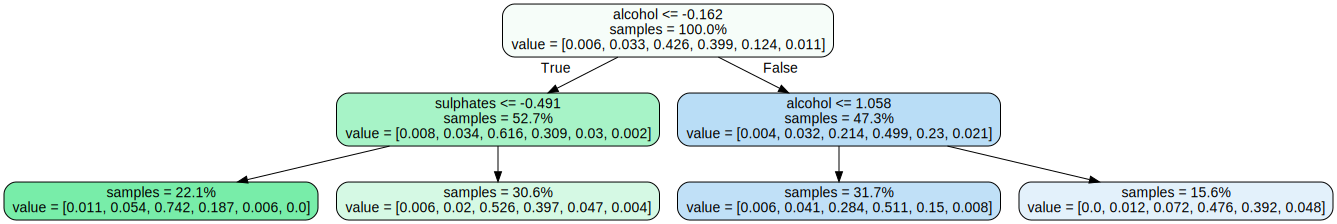

In [5]:
dot_data = export_graphviz(tree,
                          out_file=None,
                          feature_names=features.columns,
                          proportion=True,
                          impurity=False,
                          filled=True,
                          rounded=True,
                          )
graph = graphviz.Source(dot_data)
graph

## (B)

C:\Users\rileyma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



best tree depth=  {'max_depth': 4} test accuracy=  0.58


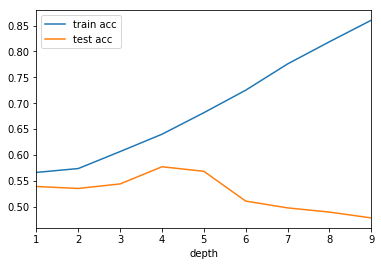

In [6]:
grid = {'max_depth':np.arange(1,10)}

tree = DecisionTreeClassifier()
treeCV = GridSearchCV(tree,param_grid = grid, return_train_score=True)
treeCV.fit(features,target)

print()
print("best tree depth= ", treeCV.best_params_, "test accuracy= ", treeCV.best_score_.round(2))

performance = pd.DataFrame()
performance['depth'] = grid['max_depth']
performance['train acc'] = treeCV.cv_results_['mean_train_score']
performance['test acc'] = treeCV.cv_results_['mean_test_score']

ax1 = performance.plot.line(x="depth", y="train acc")
performance.plot.line(x='depth',y='test acc',ax=ax1)